In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [30]:
df=pd.read_csv(r"C:\Users\rawat\OneDrive\Documents\Downloads\Indian-Resturants.csv")

## Data Overview

In [10]:
df.info

<bound method DataFrame.info of           res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda

In [14]:
#####Check Dataset Dimensions (Rows & Columns)


df.shape
df.columns

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')

In [20]:
print("Dimensions (rows, columns):", df.shape)

Dimensions (rows, columns): (211944, 26)


In [8]:
df.dtypes

res_id                    int64
name                     object
establishment            object
url                      object
address                  object
city                     object
city_id                   int64
locality                 object
latitude                float64
longitude               float64
zipcode                  object
country_id                int64
locality_verbose         object
cuisines                 object
timings                  object
average_cost_for_two      int64
price_range               int64
currency                 object
highlights               object
aggregate_rating        float64
rating_text              object
votes                     int64
photo_count               int64
opentable_support       float64
delivery                  int64
takeaway                  int64
dtype: object

In [9]:
####if any missing values exist


df.isnull().values.any()

True

In [11]:
df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

 # Basic Statistics

In [25]:
average_rating = df["aggregate_rating"].mean()
print("Average Restaurant Rating:", round(average_rating, 2))


Average Restaurant Rating: 3.4


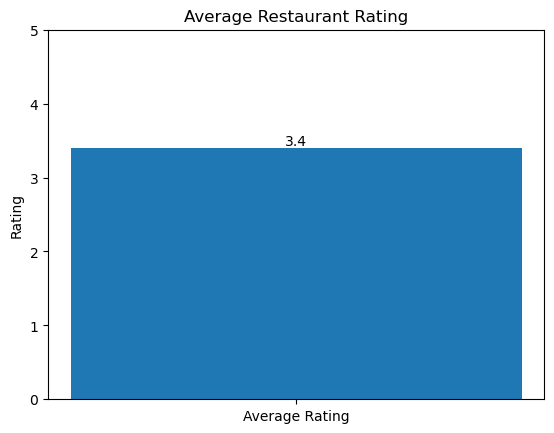

In [27]:
plt.figure()
plt.bar(['Average Rating'], [average_rating])
plt.ylabel('Rating')
plt.title('Average Restaurant Rating')

# Show value on bar
plt.text(0, average_rating, round(average_rating, 2),
         ha='center', va='bottom')

plt.ylim(0, 5)
plt.show()

In [28]:
df['aggregate_rating'].describe()

count    211944.000000
mean          3.395937
std           1.283642
min           0.000000
25%           3.300000
50%           3.800000
75%           4.100000
max           4.900000
Name: aggregate_rating, dtype: float64

In [33]:
print("Minimum Rating:", df['aggregate_rating'].min())
print("Maximum Rating:", df['aggregate_rating'].max())
print("Average Rating:", round(df['aggregate_rating'].mean(), 2))
print("Median Rating:", df['aggregate_rating'].median())

Minimum Rating: 0.0
Maximum Rating: 4.9
Average Rating: 3.4
Median Rating: 3.8


## Location Analysis:

In [38]:
# Count number of restaurants in each city
city_counts = df['city'].value_counts()

# City with highest concentration
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print("City with highest concentration of restaurants:", top_city)
print("Number of restaurants:", top_city_count)

City with highest concentration of restaurants: Chennai
Number of restaurants: 11630


<Figure size 1000x500 with 0 Axes>

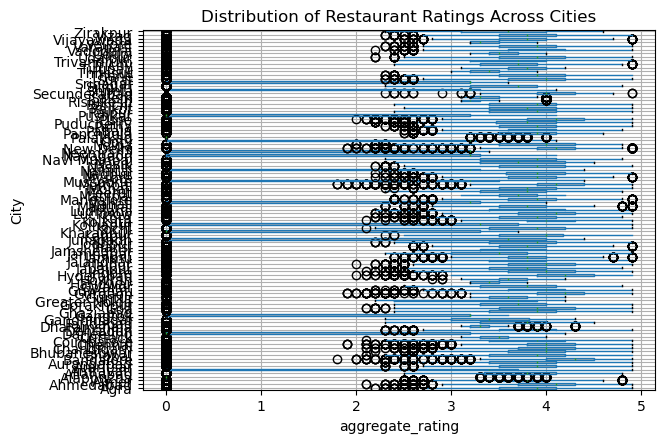

In [42]:
plt.figure(figsize=(10, 5))
df.boxplot(column='aggregate_rating', by='city', vert=False)
plt.xlabel("aggregate_rating")
plt.ylabel("City")
plt.title("Distribution of Restaurant Ratings Across Cities")
plt.suptitle("")  # remove automatic subtitle
plt.show()

C:\Users\rawat\AppData\Local\Temp\ipykernel_1852\3980760887.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=top_cities)


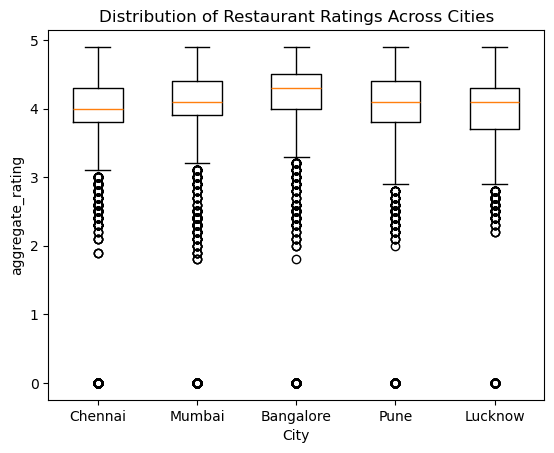

In [43]:
import matplotlib.pyplot as plt

# Get top cities by number of restaurants
top_cities = df['city'].value_counts().head(5).index

# Create data for boxplot
data = [
    df[df['city'] == city]['aggregate_rating']
    for city in top_cities
]

# Plot
plt.figure()
plt.boxplot(data, labels=top_cities)
plt.xlabel("City")
plt.ylabel("aggregate_rating")
plt.title("Distribution of Restaurant Ratings Across Cities")
plt.show()

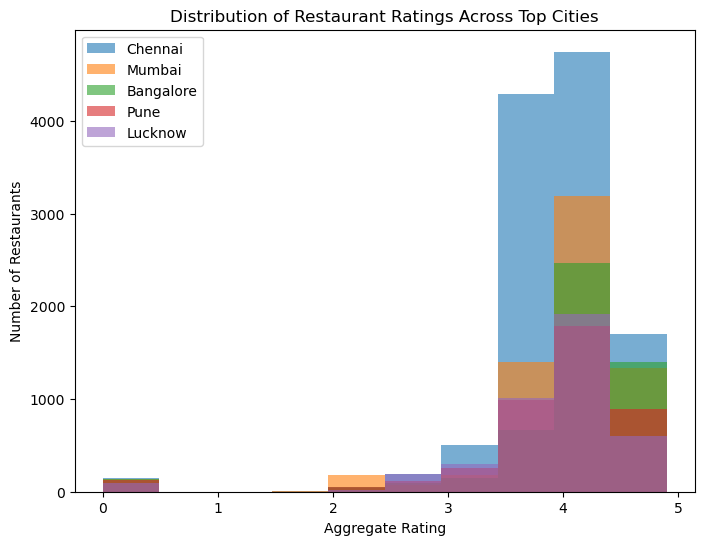

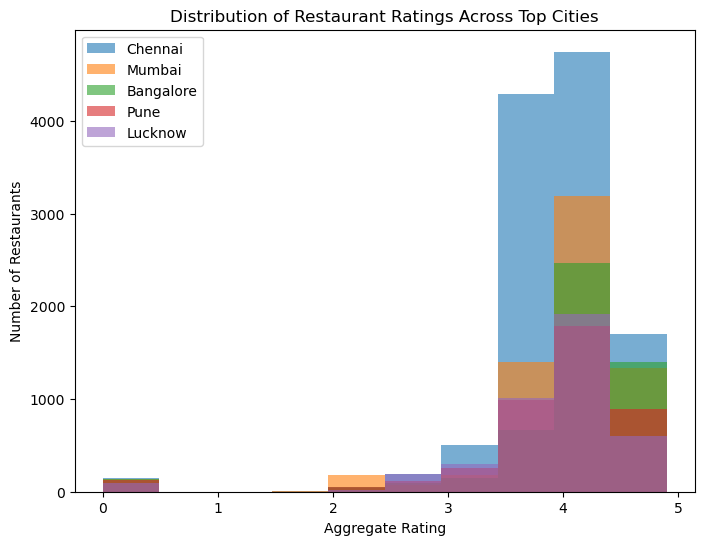

In [49]:
plt.figure(figsize=(8, 6))

for city in top_cities:
    city_ratings = df[df['city'] == city]['aggregate_rating']
    plt.hist(city_ratings, bins=10, alpha=0.6, label=city)

plt.xlabel("Aggregate Rating")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurant Ratings Across Top Cities")
plt.legend()
plt.show()

## Cuisine Analysis:

In [50]:
# Drop missing cuisine values
df = df.dropna(subset=['cuisines'])

# Split multiple cuisines into individual rows
cuisine_series = df['cuisines'].str.split(',').explode()

# Remove extra spaces
cuisine_series = cuisine_series.str.strip()

# Count frequency of each cuisine
cuisine_counts = cuisine_series.value_counts()

# Display top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_counts.head(10))

Top 10 Most Popular Cuisines:
cuisines
North Indian    85965
Chinese         57989
Fast Food       48584
South Indian    28895
Continental     26126
Beverages       24382
Cafe            23140
Desserts        21437
Italian         20920
Biryani         18315
Name: count, dtype: int64


Correlation between cuisine variety and rating: 0.231


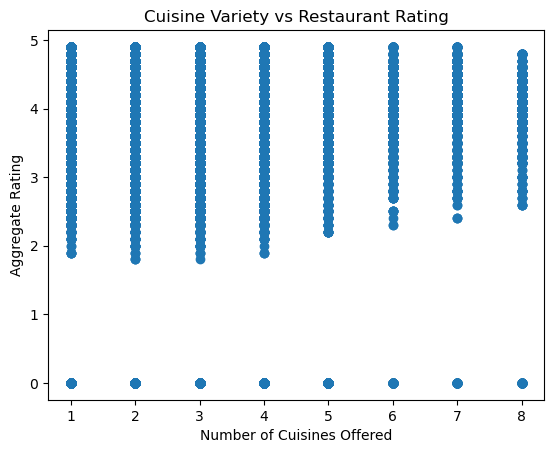

In [61]:
# Convert rating column to numeric
df['aggregate_rating'] = pd.to_numeric(
    df['aggregate_rating'], errors='coerce'
)

# Drop rows with missing values
df = df.dropna(subset=['cuisines', 'aggregate_rating'])

# Calculate number of cuisines per restaurant
df['cuisine_count'] = df['cuisines'].apply(
    lambda x: len(x.split(','))
)

# --------- Correlation ---------
correlation = df['cuisine_count'].corr(df['aggregate_rating'])
print("Correlation between cuisine variety and rating:", round(correlation, 3))

# --------- Scatter Plot ---------
plt.figure()
plt.scatter(df['cuisine_count'], df['aggregate_rating'])
plt.xlabel("Number of Cuisines Offered")
plt.ylabel("Aggregate Rating")
plt.title("Cuisine Variety vs Restaurant Rating")
plt.show()

## Price Range and Rating:

In [57]:
correlation = df['price_range'].corr(df['aggregate_rating'])
print("Correlation:", correlation)

Correlation: 0.24726487522059298


<Figure size 640x480 with 0 Axes>

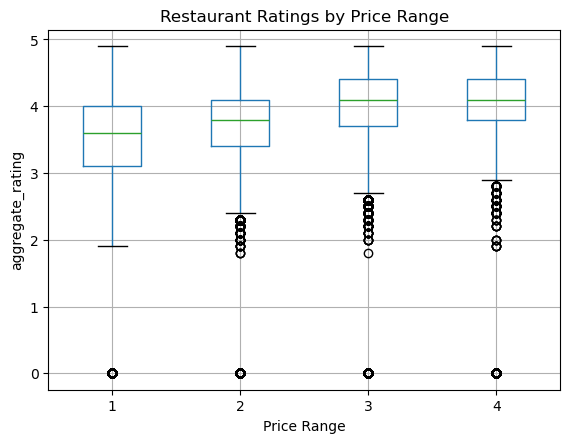

In [61]:
plt.figure()
df.boxplot(column='aggregate_rating', by='price_range')
plt.xlabel("Price Range")
plt.ylabel("aggregate_rating")
plt.title("Restaurant Ratings by Price Range")
plt.suptitle("")
plt.show()

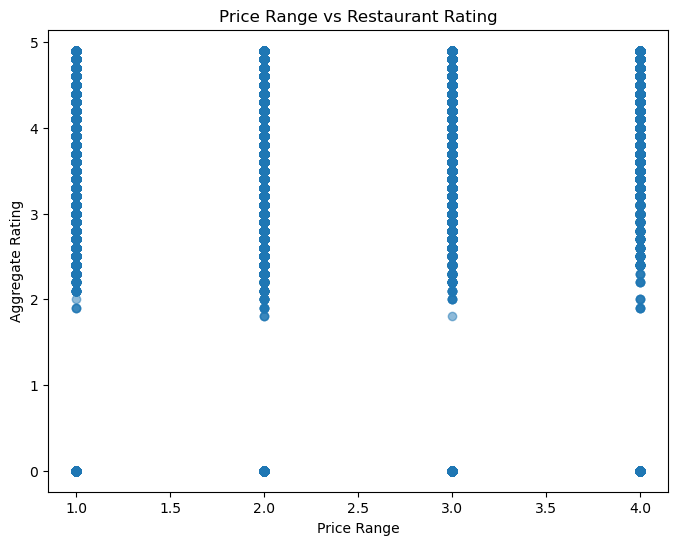

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(df['price_range'], df['aggregate_rating'], alpha=0.5)
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.title("Price Range vs Restaurant Rating")
plt.show()

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'cuisine_count', 'cost_for_two'],
      dtype='object')
Average cost for two by price category:
price_range
1     227.307831
2     516.075185
3    1088.296629
4    2216.451551
Name: average_cost_for_two, dtype: float64


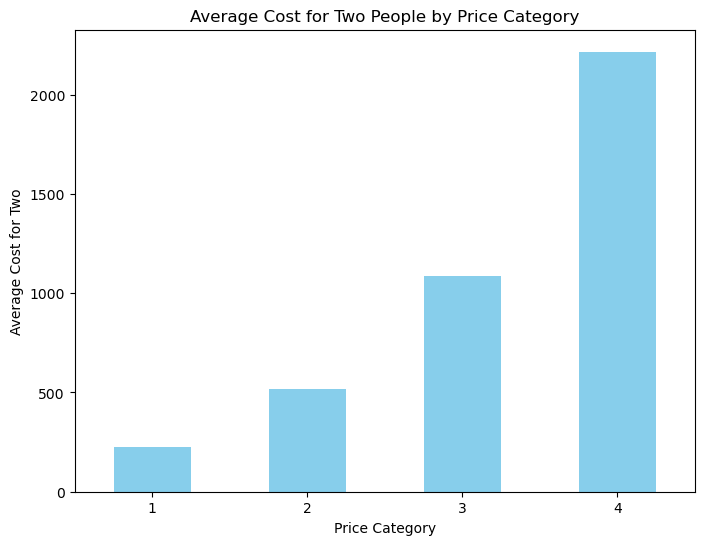

In [143]:
# Check column names
print(df.columns)  # Use this to confirm the exact names

# Replace column names if different
price_col = 'price_range'        # price category
cost_col = 'average_cost_for_two'        # cost for two people

# Convert columns to numeric
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
df[cost_col] = pd.to_numeric(df[cost_col], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=[price_col, cost_col])

# Calculate average cost per price category
avg_cost = df_clean.groupby(price_col)[cost_col].mean()

# Display the result
print("Average cost for two by price category:")
print(avg_cost)

# --------- Bar Chart ---------
plt.figure(figsize=(8,6))
avg_cost.plot(kind='bar', color='skyblue')
plt.xlabel("Price Category")
plt.ylabel("Average Cost for Two")
plt.title("Average Cost for Two People by Price Category")
plt.xticks(rotation=0)
plt.show()


## Online Order and Table Booking:

   delivery  aggregate_rating
0        -1               4.4
1        -1               4.4
2         1               4.2
3         1               4.3
4         1               4.9

Average Rating by Online Order Availability:
delivery
-1    3.193217
 0    3.365058
 1    3.739424
Name: aggregate_rating, dtype: float64


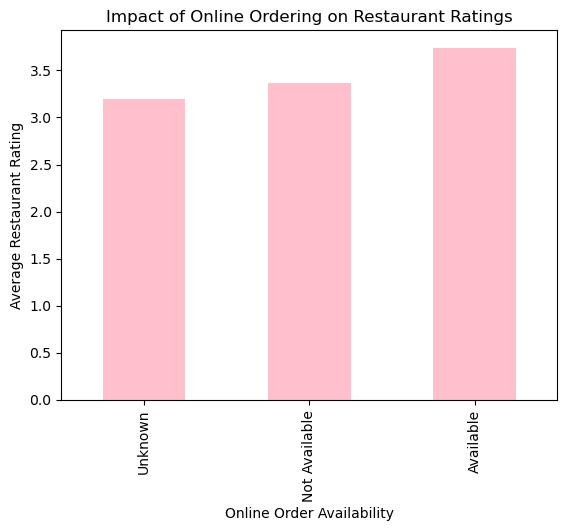

In [5]:
# Investigate the impact of online order availability on restaurant ratings
# Check required columns
print(df[['delivery', 'aggregate_rating']].head())

# Convert delivery column to numeric (if needed)
df['delivery'] = pd.to_numeric(df['delivery'], errors='coerce')

# Group by delivery availability and calculate mean rating
rating_by_delivery = df.groupby('delivery')['aggregate_rating'].mean()

print("\nAverage Rating by Online Order Availability:")
print(rating_by_delivery)

# Map delivery values for better readability
rating_by_delivery.index = rating_by_delivery.index.map({
    -1: 'Unknown',
     0: 'Not Available',
     1: 'Available'
})

# Plotting the results the results
plt.figure()
rating_by_delivery.plot(kind='bar', color='pink')
plt.xlabel('Online Order Availability')
plt.ylabel('Average Restaurant Rating')
plt.title('Impact of Online Ordering on Restaurant Ratings')
plt.show()

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')
Distribution of restaurants offering table booking:
opentable_support
0.0    211896
Name: count, dtype: int64


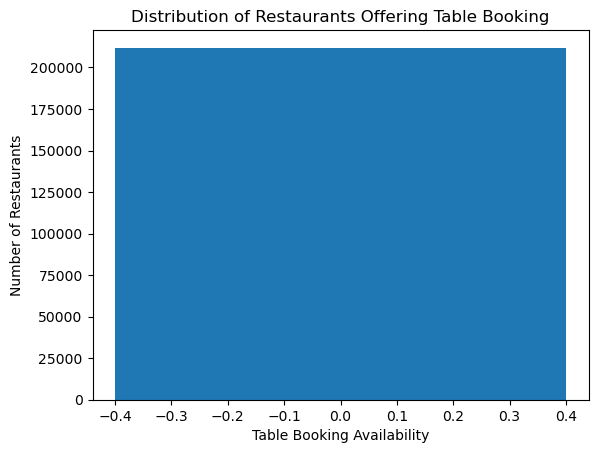

In [7]:
# Check column names (optional)
print(df.columns)

# Count distribution of table booking
table_booking_counts = df['opentable_support'].value_counts()

print("Distribution of restaurants offering table booking:")
print(table_booking_counts)

# Plot bar chart
plt.figure()
plt.bar(table_booking_counts.index, table_booking_counts.values)
plt.xlabel("Table Booking Availability")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Restaurants Offering Table Booking")
plt.show()

## Top Restaurant Chains:

##Identify and visualize the top restaurant chains based on the number of outlets

In [10]:
top_chains = df['name'].value_counts().head(10)


top_chains

In [11]:
top_chains

name
Domino's Pizza        3108
KFC                   1343
Cafe Coffee Day       1068
Pizza Hut              936
Subway                 766
Barbeque Nation        725
Burger King            658
McDonald's             578
Keventers              512
The Chocolate Room     461
Name: count, dtype: int64

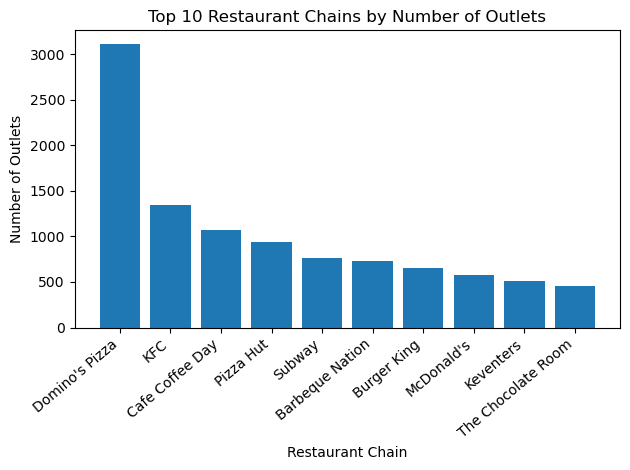

In [12]:
plt.figure()
plt.bar(top_chains.index, top_chains.values)
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()

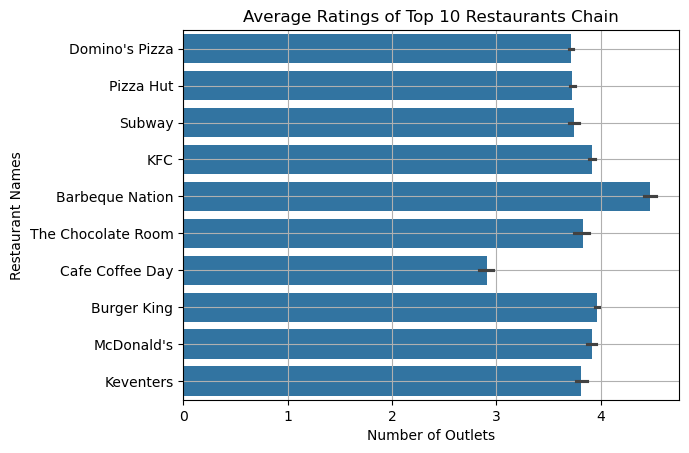

In [15]:
# Explore the ratings of these top chains
import seaborn as sns
sns.barplot(y="name",x="aggregate_rating",data=df[df["name"].isin(top_chains.index)])
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Names')
plt.title("Average Ratings of Top 10 Restaurants Chain")
plt.grid(True)
plt.show()

## Restaurant Feature


In [ ]:
###Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol
availability, etc.

In [16]:
# Check columns (optional)
print(df.columns)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')


In [22]:
# Ensure highlights column is string
df['highlights'] = df['highlights'].astype(str)

# Create availability flags
df['WiFi'] = df['highlights'].str.contains('Wi-Fi', case=False)
df['Alcohol'] = df['highlights'].str.contains('Alcohol', case=False)
df['Takeaway Available'] = df['highlights'].str.contains('Takeaway Available', case=False)

# Count availability
wifi_counts = df['WiFi'].value_counts()
alcohol_counts = df['Alcohol'].value_counts()
takeaway_counts = df['Takeaway Available'].value_counts()

print("Wi-Fi Availability:")
print("Offers Wi-Fi:", wifi_counts.get(True, 0))
print("Does NOT offer Wi-Fi:", wifi_counts.get(False, 0))

print("\nAlcohol Availability:")
print("Serves Alcohol:", alcohol_counts.get(True, 0))
print("Does NOT serve Alcohol:", alcohol_counts.get(False, 0))

print("\nTakeaway Availability:")
print("Takeaway Available:", takeaway_counts.get(True, 0))
print("No Takeaway:", takeaway_counts.get(False, 0))

Wi-Fi Availability:
Offers Wi-Fi: 0
Does NOT offer Wi-Fi: 211944

Alcohol Availability:
Serves Alcohol: 83876
Does NOT serve Alcohol: 128068

Takeaway Availability:
Takeaway Available: 180942
No Takeaway: 31002



Distribution of Alcohol:
Alcohol
False    128068
True      83876
Name: count, dtype: int64


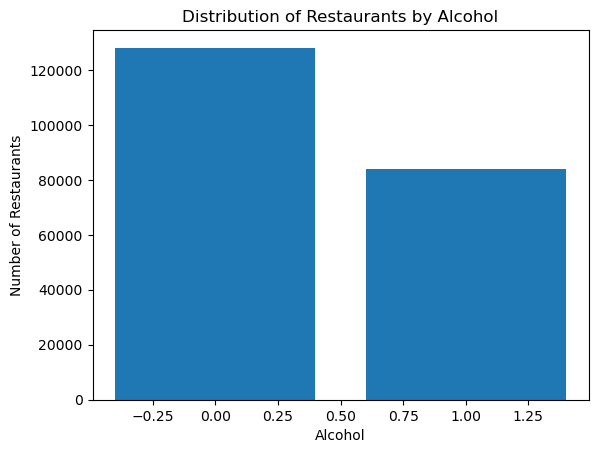

In [24]:
# List of feature columns to analyze
features = [
    'Online order',
    'Table booking',
    'Wifi',
    'Alcohol'
]

# Loop through each feature and plot distribution
for feature in features:
    if feature in df.columns:
        feature_counts = df[feature].value_counts()

        print(f"\nDistribution of {feature}:")
        print(feature_counts)

        plt.figure()
        plt.bar(feature_counts.index, feature_counts.values)
        plt.xlabel(feature)
        plt.ylabel("Number of Restaurants")
        plt.title(f"Distribution of Restaurants by {feature}")
        plt.show()

In [34]:
## Investigate if the presence of certain features correlates with higher ratings.


In [39]:
# Investigate if the presence of ceratin features correlates with higher ratings
# Convert highlights to string
df['highlights'] = df['highlights'].astype(str)

# Identify rating column safely
rating_col = None
for col in df.columns:
    if 'rating' in col.lower():
        rating_col = col
        break

print("Using rating column:", rating_col)

# Convert ratings to numeric
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

# Extract features
df['WiFi'] = df['highlights'].str.contains('Wi-Fi', case=False)
df['Alcohol'] = df['highlights'].str.contains('Alcohol', case=False)
df['Alcohol'] = df['highlights'].str.contains('Alcohol', case=False)
df['Air Conditioned'] = df['highlights'].str.contains('Air Conditioned', case=False)
df['Air Conditioned'] = df['highlights'].str.contains('Air Conditioned', case=False)
df['Outdoor Seating'] = df['highlights'].str.contains('Outdoor Seating', case=False)

features = ['WiFi', 'Alcohol' , 'Air Conditioned' , 'Outdoor Seating']

# Analyze & visualize
for feature in features:
    avg_ratings = df.groupby(feature)[rating_col].mean().round(2)

    print(f"\nAverage Rating based on {feature}:")
    print("No :", avg_ratings.get(False))
    print("Yes:", avg_ratings.get(True))

Using rating column: aggregate_rating

Average Rating based on WiFi:
No : 3.4
Yes: None

Average Rating based on Alcohol:
No : 3.25
Yes: 3.63

Average Rating based on Air Conditioned:
No : 3.04
Yes: 3.77

Average Rating based on Outdoor Seating:
No : 3.34
Yes: 3.69


## Word Cloud for Reviews:

In [44]:
pip install wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


In [55]:
import re
from wordcloud import WordCloud, STOPWORDS

In [52]:
stop_words = set(STOPWORDS)

Review column: rating_text
Rating column: aggregate_rating


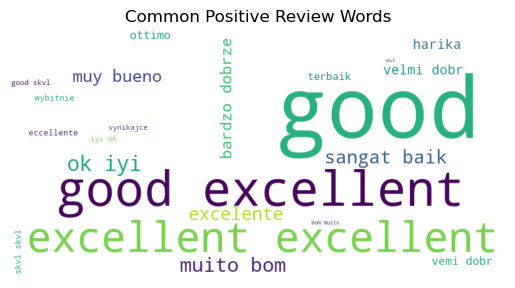

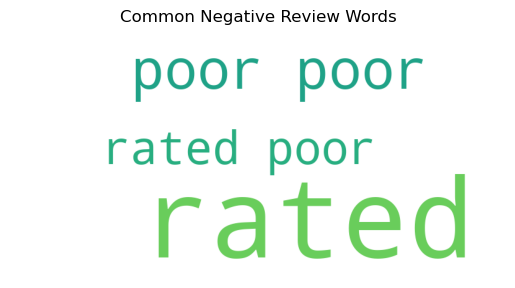

In [56]:
# Create a word cloud based on customer reviews to identify common positive and negative sentiments
# Columns
review_col = 'rating_text'

# Identify rating column
rating_col = None
for col in df.columns:
    if 'rating' in col.lower() and col != review_col:
        rating_col = col
        break

print("Review column:", review_col)
print("Rating column:", rating_col)

# Convert to correct formats
df[review_col] = df[review_col].astype(str)
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_reviews'] = df[review_col].apply(clean_text)

# Split reviews by sentiment using ratings
positive_reviews = df[df[rating_col] >= 4]['clean_reviews']
negative_reviews = df[df[rating_col] <= 2]['clean_reviews']

# Combine text
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)

stopwords = set(STOPWORDS)

# Positive Word Cloud
plt.figure()
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(positive_text)

plt.imshow(wc_pos)
plt.axis('off')
plt.title("Common Positive Review Words")
plt.show()

# Negative Word Cloud
plt.figure()
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stopwords
).generate(negative_text)

plt.imshow(wc_neg)
plt.axis('off')
plt.title("Common Negative Review Words")
plt.show()

In [ ]:
## Analyze frequently mentioned words and sentiments.

In [59]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import STOPWORDS

In [60]:
# Columns
review_col = 'rating_text'

# Identify rating column
rating_col = None
for col in df.columns:
    if 'rating' in col.lower() and col != review_col:
        rating_col = col
        break

# Convert data types
df[review_col] = df[review_col].astype(str)
df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_reviews'] = df[review_col].apply(clean_text)

# Remove stopwords
stopwords = set(STOPWORDS)

def get_words(text_series):
    words = []
    for text in text_series:
        words.extend([word for word in text.split() if word not in stopwords])
    return words

# Sentiment split based on ratings
positive_reviews = df[df[rating_col] >= 4]['clean_reviews']
neutral_reviews  = df[df[rating_col] == 3]['clean_reviews']
negative_reviews = df[df[rating_col] <= 2]['clean_reviews']

# Word frequency counts
positive_words = Counter(get_words(positive_reviews))
neutral_words  = Counter(get_words(neutral_reviews))
negative_words = Counter(get_words(negative_reviews))

# Display top words
print("Top Most Positive Words:")
print(positive_words.most_common(10))

print("\nNeutral Words:")
print(neutral_words.most_common(10))

print("\nNegative Words:")
print(negative_words.most_common(10))

Top Most Positive Words:
[('good', 65451), ('excellent', 15737), ('ok', 56), ('iyi', 56), ('muito', 50), ('bom', 50), ('sangat', 44), ('baik', 44), ('excelente', 42), ('dobr', 39)]

Neutral Words:
[('average', 2996), ('prmr', 2), ('promedio', 1), ('media', 1), ('ortalama', 1)]

Negative Words:
[('rated', 23478), ('poor', 40)]


## Seasonal Trends

In [ ]:
## There is not seasonal trends data mentioned in the file hence cannot be defined.

## Key conclusion

In [63]:
## 1.Restaurants that offer premium features—such as online ordering, table reservations, and alcohol service—tend to achieve higher average ratings. This suggests that added convenience and an enhanced dining experience play a significant role in boosting customer satisfaction and overall perception of quality.

In [62]:
## 2.Customer reviews show that food quality, taste, and service drive positive sentiment, while slow service and pricing concerns are the main sources of negative feedback—highlighting efficiency and value for money as key areas for improvement.